# LMAPR1492: Tâche 8

In [44]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors

In [45]:
mp_key = "5KTRCxoFyWvECvvRVCS0OeflSzkuO7df"
mp_id = "mp-7575"

In [46]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Structure de bandes de phonons

Grâce à l'utilisation de neutrons, on peut sonder la structure de bande de phonons d'un matériau. Les phonons sont les particules associées aux quanta d'énergie dus aux vibrations du système.

In [47]:
fig_ph_bs = get_plot_bs(ph_bs)
fig_ph_bs.update_yaxes(rangemode="tozero")
fig_ph_bs.show()

## Zone de Brillouin

Les modes acoustiques correspondent aux bandes 1, 2 et 3 sur le schéma des bandes de phonons. En effet, les modes acoustiques sont caractérisés par leur dispersion linéaire à faible énergie et lorsque le vecteur d'onde tend vers 0 (c'est à dire au centre de la zone de Brillouin, lorsque la longueur d'onde est grande).

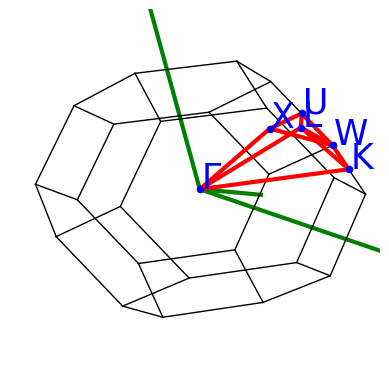

In [41]:
ph_plt = PhononBSPlotter(ph_bs)
ph_plt.plot_brillouin()

On voit que le centre de la zone de Brillouin correspond à $\Gamma$

## Calcul des vitesses du son

Lorsque $q \to 0$, $v_{son} = \frac{d\omega}{dq}$. On trouve donc la vitesse du son dans le matériau selon une direction spécifique en prenant la valeur absolue de la pente de la tangente aux bandes correspondant aux modes acoustiques lorsque $q \to 0$.
Les 3 directions que nous pouvons choisir sont donc $\Gamma \to X$, $K \to \Gamma$ et $\Gamma \to L$.
Pour transformer la fréquence en pulsation, on utilise la relation $\omega = 2\pi f$

In [34]:
freq = PhononBSPlotter(ph_bs).bs_plot_data().get('frequency')
dist = PhononBSPlotter(ph_bs).bs_plot_data().get('distances')
#signification des indices: [branch][qpoint][mode]
dy = freq[0][0][1] - freq[0][0][0]
dx = dist[0][1] - dist[0][0]
#multiplication par 10^12 car les fréquences sont données en THz
#division par 10^10 car les distances sont données en Ångström, donc le vecteur d'onde est en (Ångström)^(-1)
v_son1 = np.abs(2*np.pi*dy*10**12/(dx*10**10))
print("Vitesse du son pour la première branche acoustique dans la direction Γ→𝑋 de la zone de Brillouin: ", v_son1 , "m/s")

Vitesse du son pour la première branche acoustique dans la direction Γ→𝑋 de la zone de Brillouin:  3802.6599827730333 m/s


In [42]:
dy = freq[3][1][-1] - freq[3][1][-2]
dx = dist[3][-1] - dist[3][-2]
#multiplication par 10^12 car les fréquences sont données en THz
#division par 10^10 car les distances sont données en Ångström
v_son2 = np.abs(2*np.pi*dy*10**12/(dx*10**10))
print("Vitesse du son pour la deuxième branche acoustique dans la direction 𝐾→Γ de la zone de Brillouin: ", v_son2 , "m/s")

Vitesse du son pour la deuxième branche acoustique dans la direction 𝐾→Γ de la zone de Brillouin:  4915.073284465237 m/s


In [43]:
dy = freq[4][2][1] - freq[4][2][0]
dx = dist[4][1] - dist[4][0]
#multiplication par 10^12 car les fréquences sont données en THz
#division par 10^10 car les distances sont données en Ångström
v_son3 = np.abs(2*np.pi*dy*10**12/(dx*10**10))
print("Vitesse du son pour la troisième branche acoustique dans la direction Γ→𝐿 de la zone de Brillouin: ", v_son3 , "m/s")

Vitesse du son pour la troisième branche acoustique dans la direction Γ→𝐿 de la zone de Brillouin:  6801.142923591641 m/s
